In [73]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time
from scipy.optimize import curve_fit
from src import trigonometric_interpolation


font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}

matplotlib.rc('font', **font)
plt.rcParams['text.usetex'] = True

In [51]:
points = np.array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
                   [0, 1, 2, 3, 4, 5, 4, 3, 2, 1, 0]])
fs = trigonometric_interpolation(points)

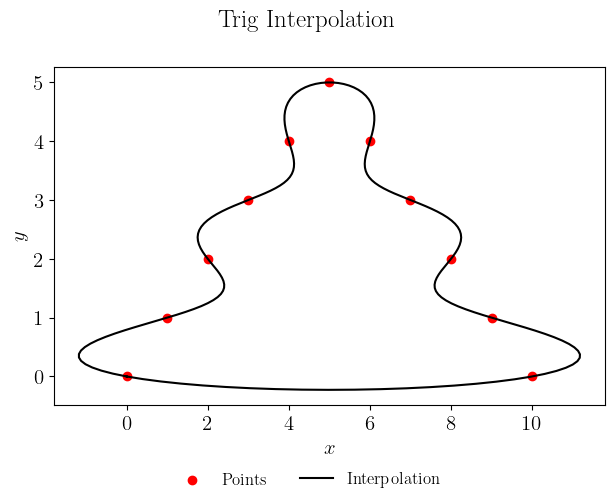

In [52]:
fig, ax = plt.subplots(1)
ax.scatter(points[0, :], points[1, :], color="red", label="Points")
ax.plot(fs[0, :], fs[1, :], color="black", label="Interpolation")

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")

fig.suptitle("Trig Interpolation")

plt.tight_layout()
fig.legend(bbox_to_anchor=(0, 0, 1, 0), loc='center', ncol=3, fontsize=12, frameon=False)
plt.savefig("plots/curve.pdf", bbox_inches='tight')
plt.show()

In [83]:

n_points = np.array(list(set(np.logspace(1.5, 3, 100, dtype=int))))
times = []

for i in range(len(n_points)):
    points = 20*np.random.random(size=(2, n_points[i]))-10
    start = time.perf_counter()
    f = trigonometric_interpolation(points)
    end = time.perf_counter()
    times.append(end-start)
times = np.array(times)

In [85]:
def linfit(x, a, b):
    return a*x + b

def power_law(x, a, b):
    return np.exp(b) * np.power(x, a)

popt, pcov = curve_fit(linfit, np.log(n_points), np.log(times))
print(popt)

[  1.97202691 -12.56752538]


Daraus folgt ein scaling von ungefähr $\approx N^2$

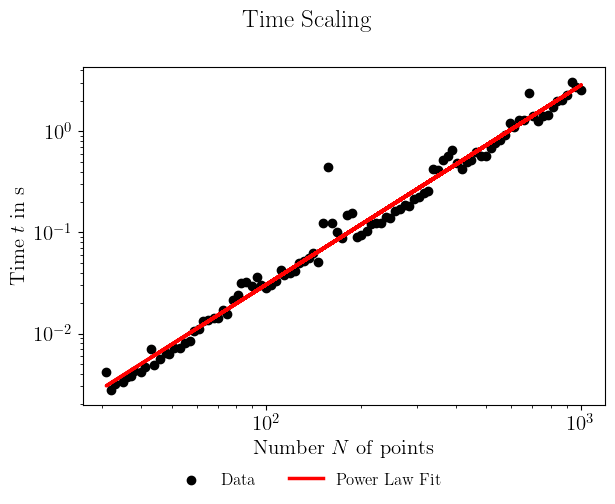

In [86]:
fig, ax = plt.subplots(1)
ax.scatter(n_points, times, color="black", label="Data")
ax.plot(n_points, power_law(n_points, *popt), color="red", linewidth=2.5, label="Power Law Fit")
ax.set_xlabel("Number $N$ of points")
ax.set_ylabel("Time $t$ in s")

ax.set_yscale("log")
ax.set_xscale("log")

fig.suptitle("Time Scaling")

plt.tight_layout()
fig.legend(bbox_to_anchor=(0, 0, 1, 0), loc='center', ncol=2, fontsize=12, frameon=False)
plt.savefig("plots/zeit.pdf", bbox_inches='tight')
plt.show()